In [2]:
import pandas as pd
import numpy as np
import math
import sklearn.datasets
from sklearn.model_selection import train_test_split
import sklearn.tree

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (8,8)

# Decision Trees

One classification algorithm we can use is a decision tree. A DT is one of the algorithms that is easiest to visualize and understand, it can be represented as a series of simple decisions, in the shape of a tree. 

The tree effectively looks at each feature and splits the records based on that feature's value. It repeats this until every record is grouped into one of the target classes. Trees are one of the models that we can draw and follow manually, so they also offer us a bit of a look into the mechanics of how machine learning models make decisions. 

### Load Data

We'll load some data to classify, the target value here is if a patient has breast cancer, and the features are a bunch of lab/medical examination measures. 

In [3]:
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

#Swap datasets for a more complex example
df = sklearn_to_df(sklearn.datasets.load_breast_cancer())

#df = sklearn_to_df(sklearn.datasets.load_iris())
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


### Plot PairPlot of Data

First we'll load some data and take a quick look at it, not a full eda. The pairplot is slow and large, but serves to visually highlight what we are doing in the classification - we want to effectively draw a line separating the blues from the oranges in those scatter plots. The plots show a 2d slice, the full classification does it in 30 dimensions, but the concept is the same, draw a line that splits the groups as accurately as we can. Note the sklearn_to_df function below, the sklearn datasets aren't returned in nice clean dataframes like we're used to. This function just formats them to be so. This would be a good addition to the utility file is you're so inclined. 

In [5]:
# This serves an illustrative point, but is slow
# Comment out if running frequently
sns.pairplot(data=df.sample(50), hue="target")

KeyboardInterrupt: 

### Create Tree Model and Plot it

We will start by creating and displaying a tree predictive model. The mechanics of creating and using the model are almost identical to the linear and logistic regression models we previously used from SK Learn. We'll make a model with all the default settings and see what we get. 

Giving the plot_tree function the columns[:-1] is an easy way to add the labels to the printed output, making it easier to read. 

8
Training Accuracy: 1.0
Testing Accuracy: 0.8811188811188811


[Text(0.5595238095238095, 0.9444444444444444, 'mean concave points <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]\nclass = True'),
 Text(0.35714285714285715, 0.8333333333333334, 'worst area <= 952.9\ngini = 0.095\nsamples = 260\nvalue = [13, 247]\nclass = True'),
 Text(0.23809523809523808, 0.7222222222222222, 'area error <= 42.19\ngini = 0.054\nsamples = 252\nvalue = [7, 245]\nclass = True'),
 Text(0.14285714285714285, 0.6111111111111112, 'worst compactness <= 0.454\ngini = 0.032\nsamples = 247\nvalue = [4, 243]\nclass = True'),
 Text(0.09523809523809523, 0.5, 'worst texture <= 30.145\ngini = 0.024\nsamples = 246\nvalue = [3, 243]\nclass = True'),
 Text(0.047619047619047616, 0.3888888888888889, 'gini = 0.0\nsamples = 215\nvalue = [0, 215]\nclass = True'),
 Text(0.14285714285714285, 0.3888888888888889, 'smoothness error <= 0.004\ngini = 0.175\nsamples = 31\nvalue = [3, 28]\nclass = True'),
 Text(0.09523809523809523, 0.2777777777777778, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]

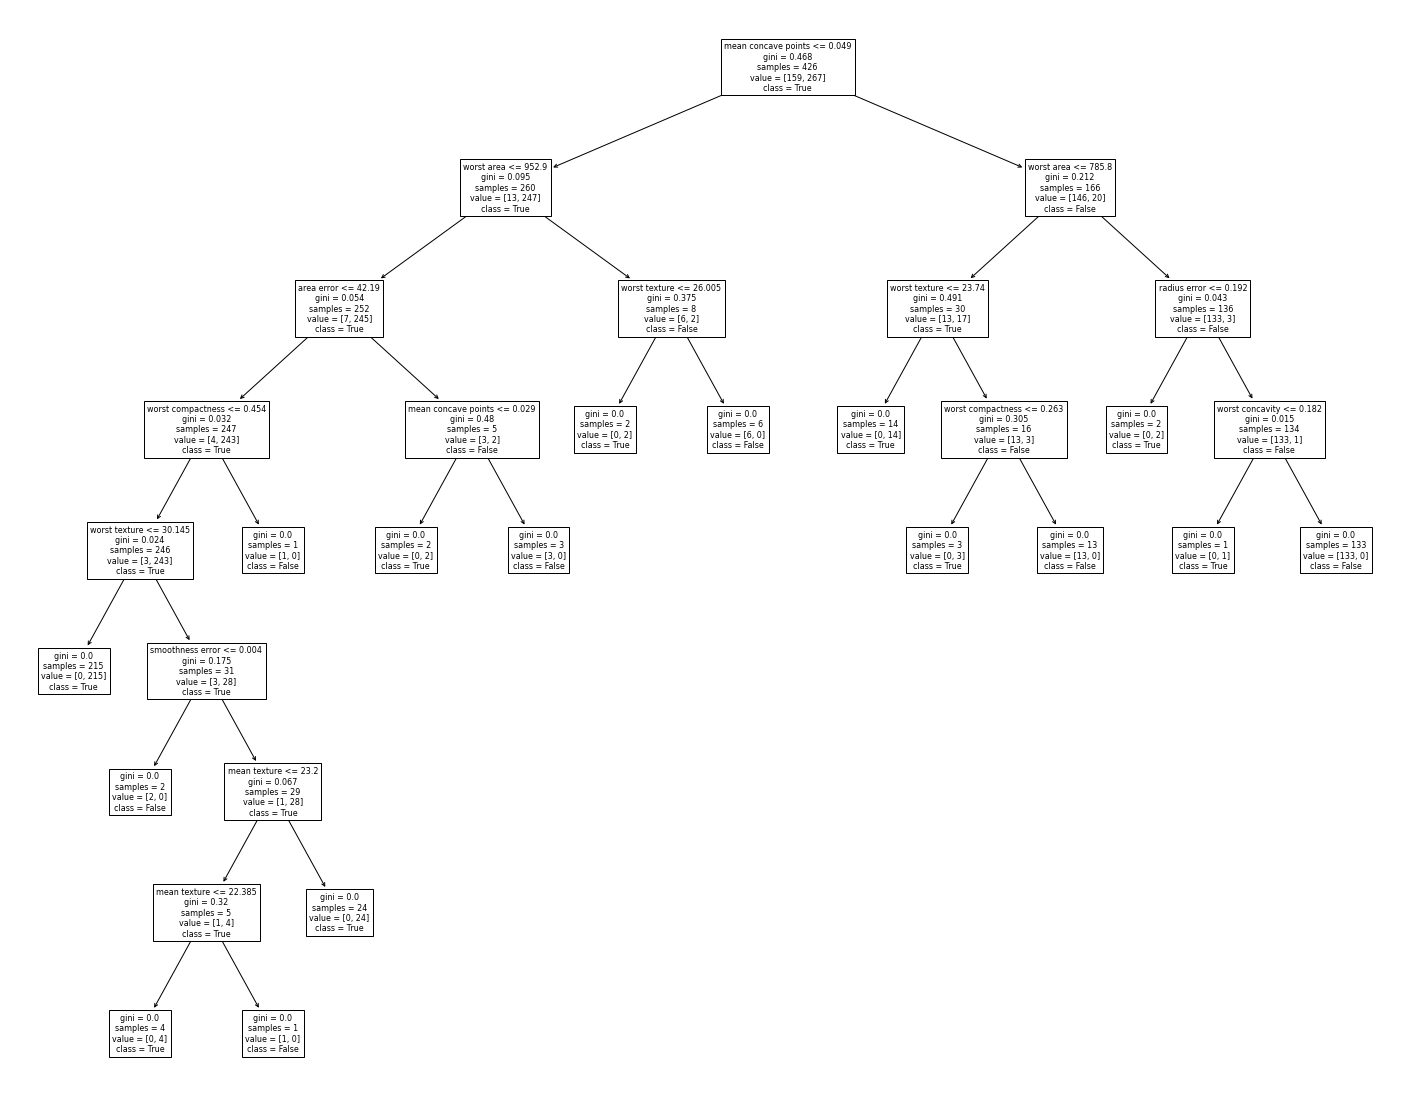

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

#Trees don't theoretically require dummies, but sklearns implemention does.
df2 = pd.get_dummies(df, drop_first=True)
y = np.array(df2["target"]).reshape(-1,1)
X = np.array(df2.drop(columns={"target"}))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train, y_train)
print(clf.get_depth())
print("Training Accuracy:", clf.score(X_train, y_train))
print("Testing Accuracy:", clf.score(X_test, y_test))
plt.figure(figsize=(25,20))
plot_tree(clf, feature_names=df.columns[:-1], class_names=["False","True"])

### Tree Based Feature Importance

Since the decision tree is a model we can look at in detail, we can also extract the feature importance. We'll do more with this in the feature selection part in a couple of weeks. The feature importance here is an evaluation, from the training process, of which of the features is most important in making the predictions. 

Note that these importances may not be the same as other determinations of feature importance, they may not even be super stable in different executions of training the tree. 

In [6]:
importances = clf.feature_importances_
feat_imp = pd.Series(importances, index=df2.drop(columns={"target"}).columns)
feat_imp.sort_values(ascending=False)[0:5]

mean concave points    0.711601
worst area             0.113736
worst texture          0.067060
worst compactness      0.034211
radius error           0.019480
dtype: float64

### Tree Split Criteria

We can repeat with entropy to see what results from that, and if there's a real difference in the resulting tree. 

7
Training Accuracy: 1.0
Testing Accuracy: 0.958041958041958


[Text(0.5625, 0.9375, 'mean concave points <= 0.049\nentropy = 0.953\nsamples = 426\nvalue = [159, 267]\nclass = True'),
 Text(0.325, 0.8125, 'worst radius <= 16.825\nentropy = 0.286\nsamples = 260\nvalue = [13, 247]\nclass = True'),
 Text(0.2, 0.6875, 'area error <= 46.315\nentropy = 0.143\nsamples = 246\nvalue = [5, 241]\nclass = True'),
 Text(0.1, 0.5625, 'worst texture <= 30.145\nentropy = 0.096\nsamples = 243\nvalue = [3, 240]\nclass = True'),
 Text(0.05, 0.4375, 'entropy = 0.0\nsamples = 212\nvalue = [0, 212]\nclass = True'),
 Text(0.15, 0.4375, 'worst area <= 641.6\nentropy = 0.459\nsamples = 31\nvalue = [3, 28]\nclass = True'),
 Text(0.1, 0.3125, 'entropy = 0.0\nsamples = 22\nvalue = [0, 22]\nclass = True'),
 Text(0.2, 0.3125, 'mean radius <= 13.45\nentropy = 0.918\nsamples = 9\nvalue = [3, 6]\nclass = True'),
 Text(0.15, 0.1875, 'mean texture <= 28.79\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]\nclass = False'),
 Text(0.1, 0.0625, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]\

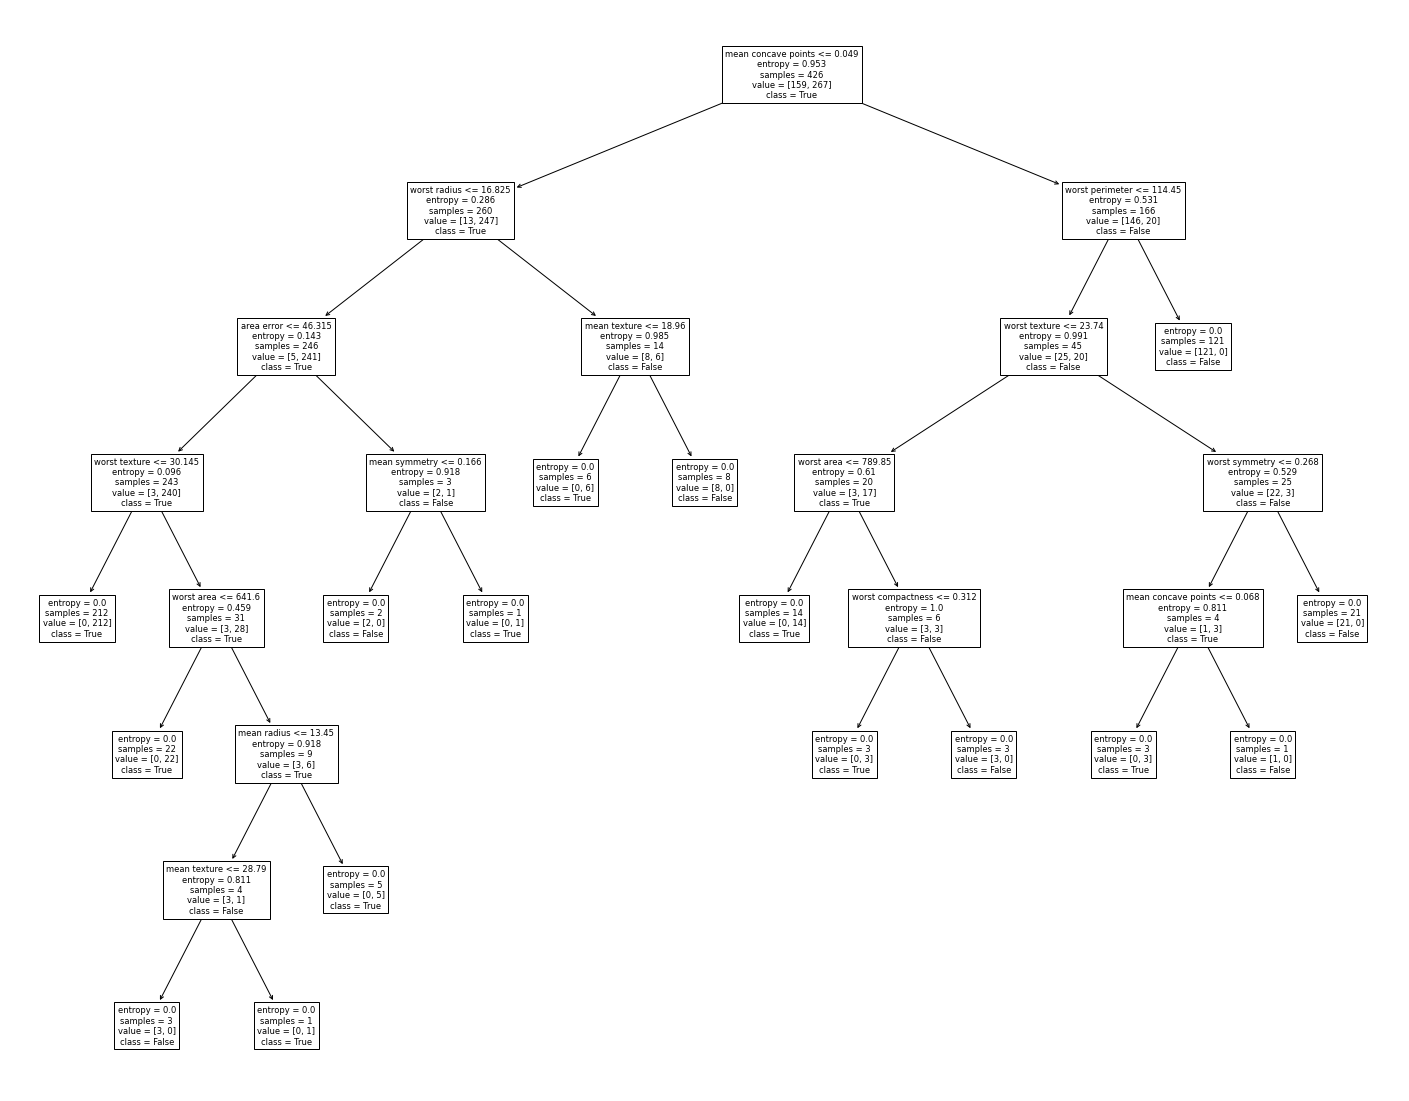

In [9]:
#Tree with entropy
clf = DecisionTreeClassifier(criterion="entropy", random_state=0)
clf = clf.fit(X_train, y_train)

print(clf.get_depth())
print("Training Accuracy:", clf.score(X_train, y_train))
print("Testing Accuracy:", clf.score(X_test, y_test))
plt.figure(figsize=(25,20))
plot_tree(clf, feature_names=df.columns[:-1], class_names=["False","True"])

### Fancy Visualizations

We can use the export_graphviz to make a nicer visualization, but it is a little bit of a process. You may need to install it (pip install python-graphviz or conda install python-graphviz). The command below will generate a file that we can then visualize. Open it and copy it into an online tool such as: https://dreampuf.github.io/GraphvizOnline There are also vscode plugins that you can try to picture things in the IDE.

This is optional.

In [10]:
from sklearn.tree import export_graphviz
export_graphviz(clf,
                     out_file="tree.dot",
                     feature_names = df.drop(columns={"target"}).columns, 
                     class_names=["0","1"],
                     filled = True)

## Decision Tree Decisions

The splits that the decision tree makes are decided by one of the criteria that we talked about in the powerpoint: gini or entropy. The tree constuction is a recursive process, each of the processes below looks at one leaf at a time, treating it like its own tree. 

## Gini and Entropy

A decision tree functions by taking one row of data, and making a bunch of yes/no decisions based on the values of its features. How does a tree decide which features to use, which order to put them in, and what the specific cutoffs for the decision are? The tree algorithm looks at all of the available features, their values, and the target values of the training data, and at each decision point determines the critieria that would do the best job of splitting the two groups. For example, if we were predicting if students would pass a test, and our features were "came to class", "read the text", and "took notes" (all T/F, for simplicity), the tree algorithm woudl look at each of those 3 features and create a node to split the data based on which one did the "best" job of accurately dividing passes from failiures; put another way, it would split the data based on whichever feature generated the fewest misclasifications in the two resulting sets, or the split that made those two sets the most "pure" - containing only passes or fails. This process then repeats until we've split everyone or a limit is hit. 

There are a couple of metrics that define the "best" when we are calculating the "best" split. Each is slightly different in its calculation, but they both do the same basic thing - give an objective measure of the uniformity of each group resulting from a split. 

### Gini Impurity and Gini Gain

Gini is the default criteria for measuring the quality of a split. When using Gini, at each node the tree algorith will choose the split that maximizes the Gini Gain. 

The Gini impurity is defined as the probability that you would misclassify a randomly selected item, when classifying according to the distribution in the dataset. This is intuitively pretty simple, check here for a good illustration: https://victorzhou.com/blog/gini-impurity/. The formual is:

$ H(Q_m) = \sum_k p_{mk} (1 - p_{mk}) $

The Gini gain takes this idea and builds on it. It is defined as the total impurity minus the weighted impurity after a split - or basically how much impurity was removed by splitting. The link above also illustrates this well. At each node of the tree, the algorithm looks at the data and chooses the split that has the highest Gini gain, that's how the decisions are chosen, ordered, and structured into a tree. 

### Entropy and Information Gain

Entropy is the alternate method for measuring the quality of a split. It is similar in concept to Gini but a little more mathmatically complex (that we don't need to derive). The formula for entropy is:

$ H(Q_m) = - \sum_k p_{mk} \log(p_{mk}) $

The probability of each item being selected multiplied by the log base 2 of that probability. 

An illustrated example of entropy and information gain is here: https://victorzhou.com/blog/information-gain/

Information gain is very similar to Gini gain at this point, we take the current entropy and subtract the weighted average of the entropy of each branch after the split. The algorithm finds the split that maximises this, and uses it to create the tree. 

## Tree Fitting

Decision trees have a few considerations, one is how many levels should the tree be? The more levels (splits) we have, the more granular our decisions will be. However, what if our tree gets so granular that it becomes too specific? The algorithm chases accuracy, and if there is a way that it can get more accuracy, it will. In practice, this may look like a tree with many, many levels - going down into very specifc sets of critera to divide the data. In one sense, this is good - we are creating a model that does an excellent job in dividing our data between classes; in another sense it can be bad - we may get a model that is very well suited to one set of data, but does poorly if we were to provide it another dataset. Since we want to make predictions for new data that we don't already have, this is bad. 

## Overfitting and Underfitting

One of the important concpets that we need to be comfortable with to create machine learning model is the concept of over and under fitting. At a high level, overfitting vs underfitting tells us how "tightly" our model is "fitted" to the training data. To do this we can look at two measures of accuracy:
<ul>
<li> Training accuracy - the accuracy the model is able to acheive on predictions of the <b>training data</b>.
    <ul>
    <li> How accurate is the model on the data that it knows.
    </ul>
<lu> Testing accuracy - the accuracy the model acheives on predictions of the <b>testing data</b>.
    <ul>
    <li> How accurate is the model on the data that it does not know. 
    </ul>
</ul>

Until now we've looked at the testing accuracy as our measure, which makes sense - that testing accuracy, after a split of the data, gives us the best estimate we can generate on what we expect the model to do with brand new data. The training accuracy, and the difference between the two, can help us learn more about the performance of our model. 

![Under-Over](images/over_under.webp "Under-Over")

In general, we want a model that is fitted tightly enought to the data to generate accurate predictions, that react to changes in the data, yet is not so tightly fitted to the training data that it is not generalizable, or transferable to making predictions on new data. In practice, our algorithms are trying to make predictions as accurately as they can on the training data, so we are often trying to limit this fitting to the training data so that it doesn't become "too fitted" to that training data, and is still good with new data. With a tree algorithm, if we don't impose any limitations, we may find our model is able to become extremely well fitted to the training data, potentially getting to 100% accuracy during training, yet this tight tailoring to the training data can make it not useful on new data that is slightly different. 

As an analogy, thing of if we were teaching a class and were trying to predict who will pass and who will fail, based on everything we can know about them. During the "training" process, where we learn how to make predictions, we are trying to make those predictions as accurate as possible (we are the algorithm here). Since we want to be super accurate, we'll use anything we can to predict passers and failiures - hockey cap = fail, sit in first row = pass, got 90%+ on the prereq class = pass, skips classes = fail, etc... Using all of these specific details may allow us to make very accurate predictions on the training data (this one class) since we have all of their information and can use it to draw very specific divisions between the two groups. This model will probably be overfitted, we can accurately predict who will pass for this class, but if we were to swap out a new set of students, what we "learned" during training wouldn't hold - now the people wearing a hockey cap or sitting in the front are new people, and we have no reason to think they'll follow the same patterns. A better model would be less specific, maybe not looking at specific factors like seat and wardrobe, and instead only looking at marks or attendance - and we'd make some more mistakes on our training class, but we'd have a model that works better as the data (students) change. <b>Note:</b> this example of "changing the variables used" is illustrative, but it isn't the only way to do this. We are not necissarily chaning the varaibles used when combatting overfitting, but we are accomplishing the same thing as this example - making the model less tailored to the training data. 

As a rule of thumb, if there is a major difference between the training accuracy and the testing accuracy, we have an issue to address - usually reducing the amount of overfitting to raise the testing accuracy at the cost of lowering the training accuracy. 

## Combatting Tree Overfitting

If we look at some trees above, we can see that the trees are often able to get to 100% accuracy on training data. This can be good, if we have a model that is perfectly well suited to the data, but it is usually bad, indicating that our model is highly tuned to the specific training data. In other words, it is too tailored to the data we gave it to learn on, or overfitted. 

### Pre-Construction

With a tree, one thing that we can do to limit the potential for overfitting is to cap the number of levels that the algorithm is allowed to create. If we do so, the model generated will have to seek the most accuracy when limited to X number of decisions. This will help prevent the model from being overfitted. In scenarios where there are lots of features, trees are often prone to overfitting. 

Decision trees also have other options, such as min_samples_split - the minimum number of results that need to be in a leaf before it is allowed to be split, that will have a similar impact. If a leaf can split if there are only 2 items (default), it can be very customized to the data as it can just split if there are two outcomes in a node. If we limit this we effectively force the tree to be more general - even if there's a difference in values in a node, it can't split those until there are X number of values there. There are a couple more options that are similar, such as max_features which will limit how many features a tree is able to consider. The SK Learn pages for each algorithm lists the hyperparameters along with pretty good descriptions on the documentation pages such as: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier There are also usually some examples linked or shown lower on the page. Take a look at the documentation and try to modify a few of the hyperparameters below and see what the results are. 

## Hyperparamaters

This also introduces us to the idea of a Hyperparamater - a paramater that controls the learning process of the algorithm. In this case max depth is a hyperpararmater (the criteria, min_split_size, and max_features are all other ones) - whatever we set it to will control how the model is created, and the impact of changing it isn't always determinable in advance. Hyperparamaters will come up in most algorithms that we use to create models, and the process for selecting what they should be is often based on trial and error. We will dig into Hyperparamaters more soon - hyperparamater tuning is one of the ways that we can maximize accuracy of our models through selection of the optimum combination of hyperparamater settings. 

If we look back to some of the previous models we looked at, we can contrast the hyperparameters to a regular paramater. In a linear or logistic regression, the training process determined the slopes and the intercept; in the Bayes algorithm the training process calculated a bunch of probabilities - these internal items are the <b>parameters</b> of the algorithm, the things that it learns during training. Hyperparameters are outside of this training process, in fact they control how it works. The <b>hyperparameters</b> are defined externally (i.e. by us) when we create/train the model, and they are not something that the algorithm can learn. Hyperparameters are totally different from algorithm to algorithm, they typically are kind of like the "settings" that the algorithm uses to create the model; typical things that HPs can control are things like the rate of training, limits on size, or type of internal calculations used. 
 
### Hyperparameter Tuning

In general, many of the things that you can provide as arguments to create the models are hyperparamaters. HP are special because they aren't things that are learned during model training (like which splits to make in a tree), they have to be set ahead of time. One of the main things that we can, and will soon, do to improve the quality of our model is to manipulate the set of hyperparameters until we get a model that delivers the best results. This HP tuning process is generally a trial and error process - we will define a set of possibilities to test, then let our code loop through each one, provide test results, and repeat until we've tried all the options. 

Manipulating the hyperparameters of an algorithm that is producing our predictive model is one of the main ways to create accurate and useful models. We can set the terms under which a model is created, try several variations, and choose the best one. Since these hyperparameters are the rules that guide the algorithms and how they function, they can have a massive impact on the resulting model, its accuracy, and other factors like the size or speed. We will modify these options in more depth when doing grid searches next(ish) time, as you can probably guess, we don't try things one by one in real life all that often.

5
Training Accuracy: 0.960093896713615
Testing Accuracy: 0.9370629370629371


[Text(0.5, 0.9166666666666666, 'mean concave points <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]\nclass = True'),
 Text(0.3076923076923077, 0.75, 'worst radius <= 16.825\ngini = 0.095\nsamples = 260\nvalue = [13, 247]\nclass = True'),
 Text(0.23076923076923078, 0.5833333333333334, 'area error <= 34.405\ngini = 0.04\nsamples = 246\nvalue = [5, 241]\nclass = True'),
 Text(0.15384615384615385, 0.4166666666666667, 'worst texture <= 30.145\ngini = 0.017\nsamples = 233\nvalue = [2, 231]\nclass = True'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 203\nvalue = [0, 203]\nclass = True'),
 Text(0.23076923076923078, 0.25, 'mean texture <= 24.465\ngini = 0.124\nsamples = 30\nvalue = [2, 28]\nclass = True'),
 Text(0.15384615384615385, 0.08333333333333333, 'gini = 0.32\nsamples = 10\nvalue = [2, 8]\nclass = True'),
 Text(0.3076923076923077, 0.08333333333333333, 'gini = 0.0\nsamples = 20\nvalue = [0, 20]\nclass = True'),
 Text(0.3076923076923077, 0.4166666666666667, 'gini = 0

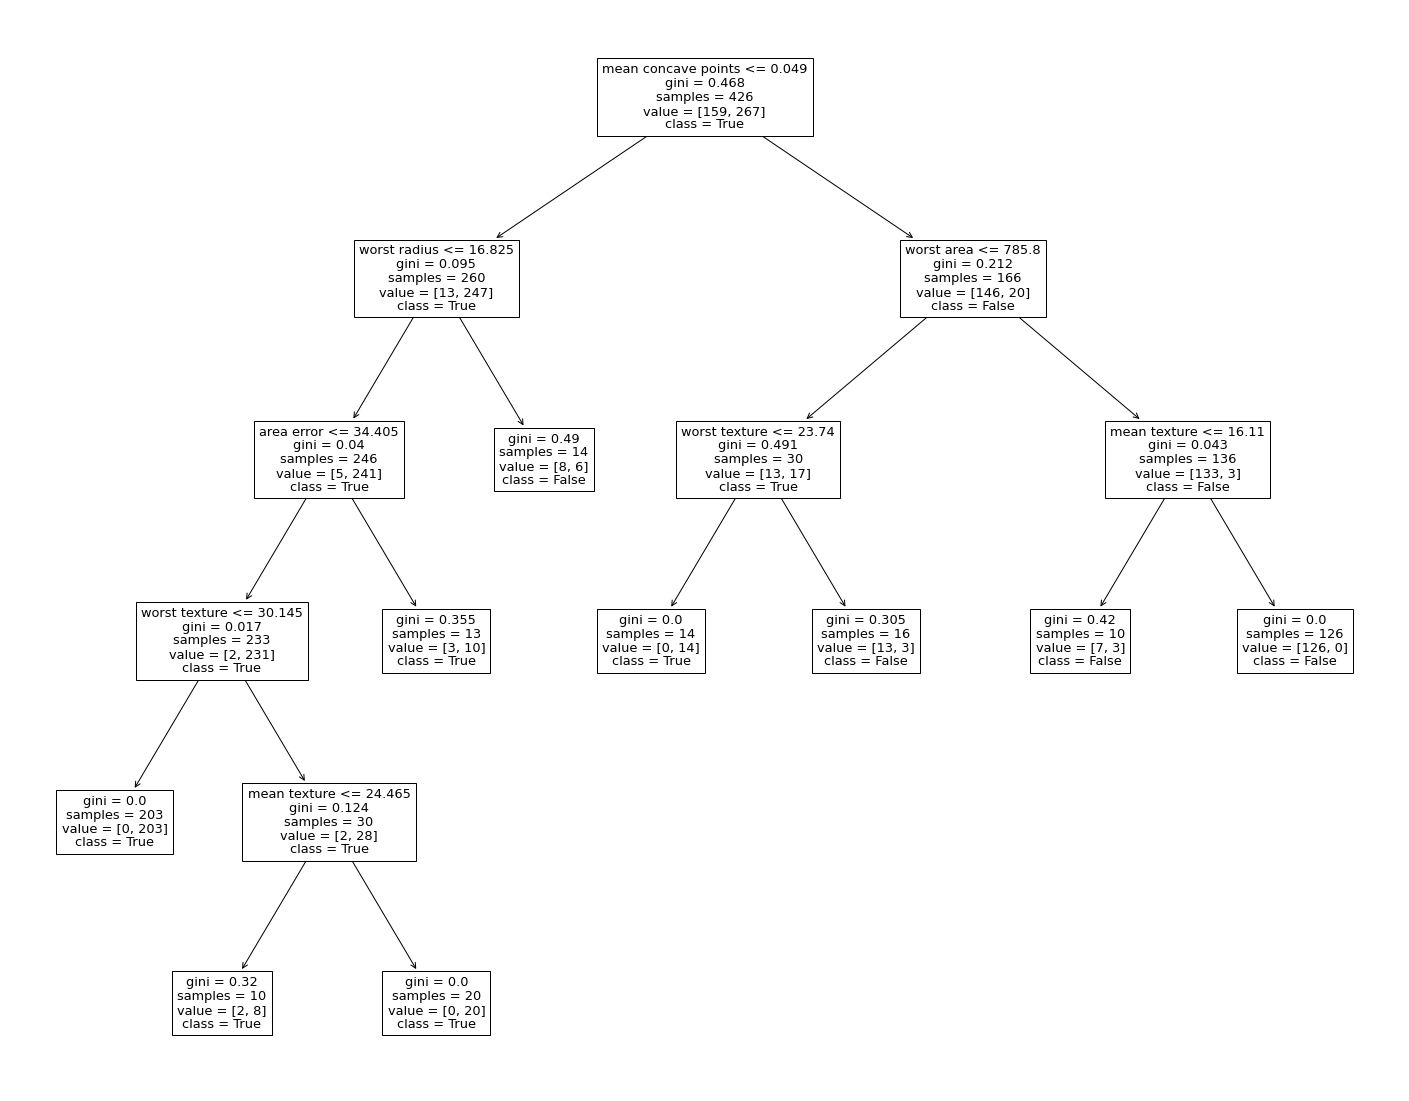

In [18]:
#limit depth
clf = DecisionTreeClassifier(min_samples_leaf=10, random_state=0)
clf = clf.fit(X_train, y_train)

print(clf.get_depth())
print("Training Accuracy:", clf.score(X_train, y_train))
print("Testing Accuracy:", clf.score(X_test, y_test))
plt.figure(figsize=(25,20))
plot_tree(clf, feature_names=df.columns[:-1], class_names=["False","True"])

### Results of Limiting Depth

Limiting depth is simple, as above. Depending on the data this may have negligable or significant impacts on the overall accuracy. One thing that we can really notice if we look at the details is shown on the "value" line, this tells us the split between the two classes of data that are at that point of the tree (remember, this is from training data). When we limit the depth here we have a tree that is unable to generate any of those taller branches that we got originally; if we look at those branches we can see that as they get taller and taller, they also contain fewer and fewer items, as well has (typically) having 100% purity of classes. <b>These tall, 100% pure, parts of the tree are an example of potential overfitting,</b> the model drills down into small subsets of the data and separtes them into classes almost one by one - this is not typically something that is generalizable, when we encounter new data it is not super likely to be well sorted by these long and specific chains. 

Our tree with limited depth isn't allowed to build those branches, so it must perform it's sorting

How deep should the tree be? The theoretical maximum is n-1, but that's not very practical. On a very small scale such as this one, you might just see what happens by default, then dial it back 1 or 2 or 3.... If we take that concept a bit further, we can construct what's called a Grid Search. The Grid Search will try multiple values for max depth, and give us back all the results. 

## Post-Construction Tools to Combat Overfitting - Pruning

Another thing we can do is called pruning, as the name suggests it is basically trimming off the excess to get a nice clean tree. The pruning in sklearn is called ccp_alpha or cost complexity pruning. The premise is that it will look for the highest impurities and then cut the tree back.

This process basically trims back the least useful splits in our tree, which also effectively reduces the amount that the tree can be tailored to the training data, thus helping to limit overfitting. 

### Cost Complexity Pruning

We don't need to spend an excess of time looking at the details of pruning, be we should cover the basic math and logic behind it. The base of the concept is something called a Cost Complexity Measure for a given tree:

$ R_\alpha(T) = R(T) + \alpha|\widetilde{T}| $

Where:

$ R(T) $ is the misclassification rate of the tree. 

$ |\widetilde{T}| $ is the number of terminal nodes. 

$ \alpha $ is a parameter that controls the strength of the pruning. 

If you look at a single node (T = 1), then the formula is:

$ R_\alpha(t)=R(t)+\alpha $

So alpha is the value needed to raise the cost complexity of the node (right side of the equation) to match the cost complexity of the branch (left side). Ideally we want the branches to reduce our impurity - we want the branches to have a lower amount of misclassification. The pruning algoritm picks off the nodes with the lowest alpha, or those that are least improved by splitting, until that alpha value reaches whatever limit is specified. As nodes are killed off, the tree gets smaller and less deep, the end result being the same as if we limited it via a hyperparamater. 

Put in other words, the $ \alpha|\widetilde{T}| $ part is a penalty imposed that increases the more terminal nodes there are, so for a split to occur it must not only make the two resulting nodes more pure, it must do so "enough" to overcome this additional penalization. The higher alpha is, the higher the bar is for a split to be kept. 


We can use some sklearn demo stuff to illustrate the differences with different alpha levels, and thus different 'aggressiveness' of pruning. This demonstrates he idea of managing accuracy in the training set vs the testing set to combat overfitting, something that will come up regularly. Here we are purposefully limiting how accurate the model can get during training in order to ensure it does not become overfitted. 

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

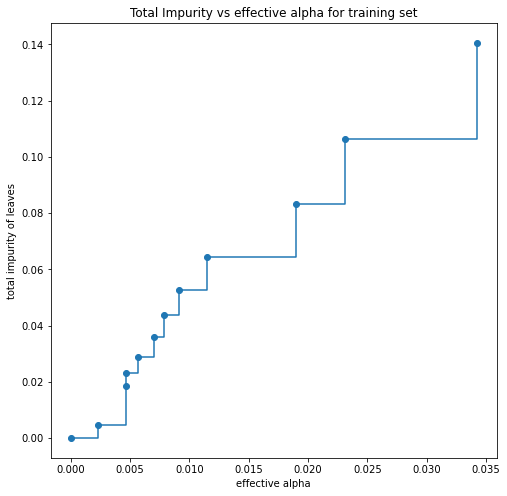

In [ ]:
#limit depth
clf = DecisionTreeClassifier()

path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

#### Pruning Results

In the chart above, the more alpha we allow, the more pruning is done, the less tailored to the data the model is allowed to become during training. We can also look at the size of the resulting tree - the more pruning, the smaller the tree. 

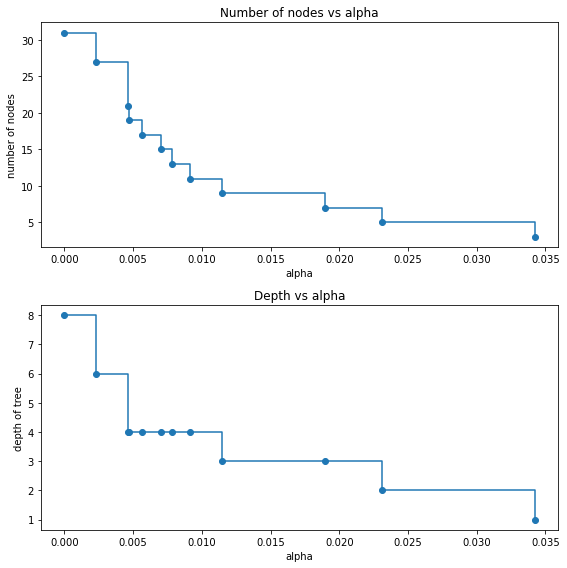

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### Alpha Changes

The alpha value acts as a limiter, we can see in the graphs above, the higher alpha gets the more simple the tree is forced to become - less depth and fewer nodes. The impact is the same as if we were to use the HP to set limits here. In effect, a higher alpha sets more strict growth limits on the tree, not allowing it to get large and potentially overfitted. A lower alpha allows the tree to adapt more to the training data, and gives the risk of overfitting. 

We can see this clearly by looking at accuracy on a graph of both the training and testing data at a bunch of different alpha levels; our goal is to get a model with is accurate at making predictions on new data, things that we've never seen before, and that accuracy is best approximated by our testing accuracy. The model learns on training data, then we evaluate it on the testing data. Our "best" model will generally be where the testing accuracy is best - the model has learned from the training data, but hasn't become too fitted to those specific records - on our accuracy charts we often end up with something that fits that pattern, the testing accuracy gets better for a while as we allow the model to "learn" more and become more fitted, then at some point the testing accuracy starts to get worse as the model starts to "memorize" the training data as it overfits. The best model is where that testing accuracy was at its peak. 

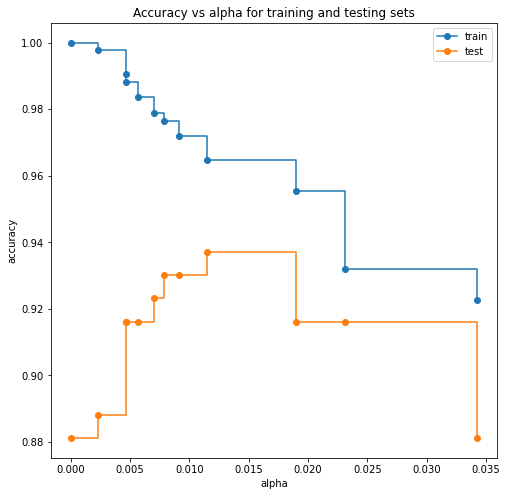

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

### Limit on Overfitting 

Here's the important bit - the impact on the test data predictions. As we saw above, if we let the tree get more and more specific (more nodes and more depth) the training accuracy will get higher and higher, and the impurity lower and lower. This is what the algorithm "wants" to do, it is trying to be as accurate as it possibly can. There's too much of a good thing here, as the model can become overfitted to the specific training data, and not as useful in general situations. 

By limiting the algorithm's ability to chase that accuracy we can stop it before that training becomes too specialized - here we are doing so with the pruning functionality, next we'll do so with tuning the HP. 

This idea comes up again with other techniques, we want to train the model to be really accurate, but kill that process once it begins to get too specific. The model "wants" to learn to predict things with 100% accuracy if given the chance, techniques like pruning act to set a limit to that learning process, hopefully stopping it before the model starts to make errors due to being to specificially tuned to the training data. 

## Exercise

Create a model to predict if each patient has heart disease or not. 

In [ ]:
#Load Data
df_ = pd.read_csv("data/heart.csv")
df_.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
#Do some exploration...

#### Create and Fit Model, View Tree
Also try a few options and observe accuracy and tree size.

13
Training Accuracy: 1.0
Testing Accuracy: 0.7608695652173914


[Text(0.5330882352941176, 0.9642857142857143, 'X[14] <= 0.5\ngini = 0.497\nsamples = 688\nvalue = [316, 372]'),
 Text(0.3, 0.8928571428571429, 'X[6] <= 0.5\ngini = 0.293\nsamples = 387\nvalue = [69, 318]'),
 Text(0.11058823529411765, 0.8214285714285714, 'X[12] <= 0.5\ngini = 0.497\nsamples = 65\nvalue = [30, 35]'),
 Text(0.0611764705882353, 0.75, 'X[1] <= 137.0\ngini = 0.45\nsamples = 38\nvalue = [25, 13]'),
 Text(0.02823529411764706, 0.6785714285714286, 'X[0] <= 55.5\ngini = 0.269\nsamples = 25\nvalue = [21, 4]'),
 Text(0.018823529411764704, 0.6071428571428571, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.03764705882352941, 0.6071428571428571, 'X[4] <= 135.0\ngini = 0.463\nsamples = 11\nvalue = [7, 4]'),
 Text(0.018823529411764704, 0.5357142857142857, 'X[4] <= 97.5\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.009411764705882352, 0.4642857142857143, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.02823529411764706, 0.4642857142857143, 'gini = 0.0\nsamples = 6\nval

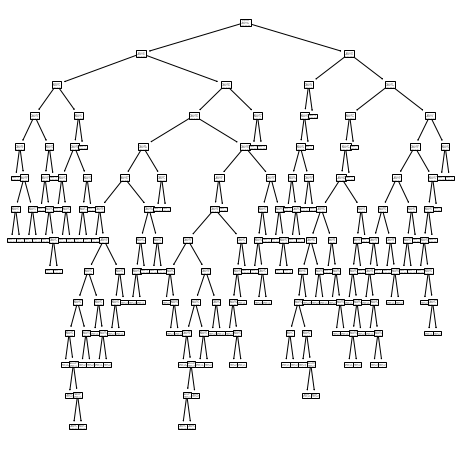

In [ ]:
#View Tree


#### Use Pruning

In [ ]:
#Model with Pruning


In [ ]:
#Find best alpha


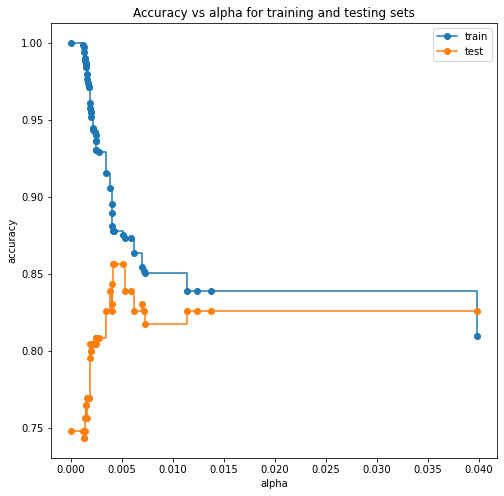

In [ ]:
#Plot


9
Training Accuracy: 0.9186046511627907
Testing Accuracy: 0.8130434782608695


[Text(0.5113636363636364, 0.95, 'X[14] <= 0.5\ngini = 0.497\nsamples = 688\nvalue = [316, 372]'),
 Text(0.25, 0.85, 'X[6] <= 0.5\ngini = 0.293\nsamples = 387\nvalue = [69, 318]'),
 Text(0.13636363636363635, 0.75, 'X[12] <= 0.5\ngini = 0.497\nsamples = 65\nvalue = [30, 35]'),
 Text(0.09090909090909091, 0.65, 'X[1] <= 137.0\ngini = 0.45\nsamples = 38\nvalue = [25, 13]'),
 Text(0.045454545454545456, 0.55, 'gini = 0.269\nsamples = 25\nvalue = [21, 4]'),
 Text(0.13636363636363635, 0.55, 'X[0] <= 65.5\ngini = 0.426\nsamples = 13\nvalue = [4, 9]'),
 Text(0.09090909090909091, 0.45, 'gini = 0.298\nsamples = 11\nvalue = [2, 9]'),
 Text(0.18181818181818182, 0.45, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.18181818181818182, 0.65, 'gini = 0.302\nsamples = 27\nvalue = [5, 22]'),
 Text(0.36363636363636365, 0.75, 'X[4] <= 176.5\ngini = 0.213\nsamples = 322\nvalue = [39, 283]'),
 Text(0.2727272727272727, 0.65, 'X[4] <= 130.5\ngini = 0.188\nsamples = 314\nvalue = [33, 281]'),
 Text(0.227272727

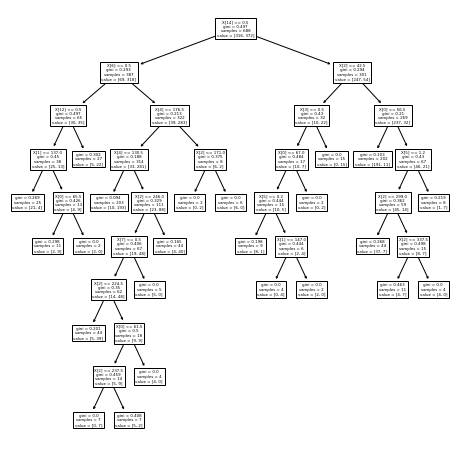

In [ ]:
#Model pruned best
